In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
import pyhere


In [2]:
dir_data_raw = pyhere.here().resolve().joinpath("data", "raw")
dir_data_interim = pyhere.here().resolve().joinpath("data", "interim")
dir_data_external = pyhere.here().resolve().joinpath("data", "external")

In [3]:
csv_power_plants = pd.read_csv(dir_data_interim/"power_plants_with_generation_transformed.csv", index_col=[0])

In [4]:
df_transformed = pd.read_csv(dir_data_external/"transformed_data_combined_with_nasa.csv", index_col=['index'])
df_transformed

,latitude,longitude,ANN_CLRSKY_SFC_SW_DNI_2009,ANN_CLRSKY_SFC_SW_DNI_2010,ANN_TQV_2009,ANN_TQV_2010,ANN_WS10M_2009,ANN_WS10M_2010,autumn_CLRSKY_SFC_SW_DNI_2009,autumn_CLRSKY_SFC_SW_DNI_2010,...,summer_TQV_2009,summer_TQV_2010,summer_WS10M_2009,summer_WS10M_2010,winter_CLRSKY_SFC_SW_DNI_2009,winter_CLRSKY_SFC_SW_DNI_2010,winter_TQV_2009,winter_TQV_2010,winter_WS10M_2009,winter_WS10M_2010
index,,,,,,,,,,,,,,,,,,,,,
0,32.3220,65.1190,7.72,7.76,9.75,9.77,3.36,3.26,7.440000,8.013333,...,10.276667,11.860000,3.893333,3.386667,6.560000,7.016667,9.003333,9.106667,2.843333,2.963333
1,31.6700,65.7950,7.47,7.36,10.63,10.71,3.22,3.09,7.420000,7.620000,...,11.146667,13.940000,3.183333,3.063333,6.536667,7.096667,10.183333,9.613333,3.196667,3.223333
2,31.6230,65.7920,7.47,7.36,10.63,10.71,3.22,3.09,7.420000,7.620000,...,11.146667,13.940000,3.183333,3.063333,6.536667,7.096667,10.183333,9.613333,3.196667,3.223333
3,34.5560,69.4787,7.96,7.96,8.84,10.03,2.87,2.72,7.240000,7.670000,...,11.420000,15.633333,3.516667,2.890000,7.080000,7.180000,6.540000,6.843333,2.373333,2.356667
4,34.6410,69.7170,7.96,7.96,10.67,12.15,2.39,2.34,7.240000,7.670000,...,15.133333,20.490000,2.380000,2.076667,7.080000,7.180000,7.730000,8.060000,2.070000,2.053333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3005,-3.2597,-39.2816,7.94,7.94,43.85,42.49,4.88,5.61,7.553333,7.643333,...,49.253333,46.223333,4.293333,5.063333,7.930000,8.150000,36.346667,37.013333,5.480000,6.730000
3006,-27.8970,-50.2862,8.23,8.02,21.05,21.21,1.48,1.55,7.560000,7.370000,...,27.340000,30.793333,1.440000,1.406667,7.246667,6.403333,15.796667,15.886667,1.630000,1.740000
3007,-23.2343,-47.6035,7.21,7.22,33.66,30.67,3.26,3.44,6.873333,7.030000,...,41.926667,42.910000,3.050000,2.956667,6.496667,6.396667,28.103333,21.610000,3.450000,3.810000


In [5]:
df_transformed.columns

Index(['latitude', 'longitude', 'ANN_CLRSKY_SFC_SW_DNI_2009',
       'ANN_CLRSKY_SFC_SW_DNI_2010', 'ANN_TQV_2009', 'ANN_TQV_2010',
       'ANN_WS10M_2009', 'ANN_WS10M_2010', 'autumn_CLRSKY_SFC_SW_DNI_2009',
       'autumn_CLRSKY_SFC_SW_DNI_2010', 'autumn_TQV_2009', 'autumn_TQV_2010',
       'autumn_WS10M_2009', 'autumn_WS10M_2010',
       'spring_CLRSKY_SFC_SW_DNI_2009', 'spring_CLRSKY_SFC_SW_DNI_2010',
       'spring_TQV_2009', 'spring_TQV_2010', 'spring_WS10M_2009',
       'spring_WS10M_2010', 'summer_CLRSKY_SFC_SW_DNI_2009',
       'summer_CLRSKY_SFC_SW_DNI_2010', 'summer_TQV_2009', 'summer_TQV_2010',
       'summer_WS10M_2009', 'summer_WS10M_2010',
       'winter_CLRSKY_SFC_SW_DNI_2009', 'winter_CLRSKY_SFC_SW_DNI_2010',
       'winter_TQV_2009', 'winter_TQV_2010', 'winter_WS10M_2009',
       'winter_WS10M_2010'],
      dtype='object')

In [6]:
csv_power_plants.loc[0:3009, ['capacity_mw', 'primary_fuel_transformed']].index.name = "index"
csv_power_plants.index.rename('index', inplace=True)
csv_power_plants


,capacity_mw,latitude,longitude,primary_fuel_transformed
index,,,,
0,33.0,32.3220,65.1190,Other
1,10.0,31.6700,65.7950,Solar
2,10.0,31.6230,65.7920,Solar
3,66.0,34.5560,69.4787,Other
4,100.0,34.6410,69.7170,Other
...,...,...,...,...
34931,50.0,-12.9667,28.6333,Other
34932,20.0,-12.8167,28.2000,Other
34933,108.0,-17.9167,25.8500,Other


In [7]:
df_transformed_combined = df_transformed.merge(csv_power_plants.loc[0:3009, ['capacity_mw', 'primary_fuel_transformed']],left_on="index", right_on="index")

In [8]:
df_transformed_combined

,latitude,longitude,ANN_CLRSKY_SFC_SW_DNI_2009,ANN_CLRSKY_SFC_SW_DNI_2010,ANN_TQV_2009,ANN_TQV_2010,ANN_WS10M_2009,ANN_WS10M_2010,autumn_CLRSKY_SFC_SW_DNI_2009,autumn_CLRSKY_SFC_SW_DNI_2010,...,summer_WS10M_2009,summer_WS10M_2010,winter_CLRSKY_SFC_SW_DNI_2009,winter_CLRSKY_SFC_SW_DNI_2010,winter_TQV_2009,winter_TQV_2010,winter_WS10M_2009,winter_WS10M_2010,capacity_mw,primary_fuel_transformed
index,,,,,,,,,,,,,,,,,,,,,
0,32.3220,65.1190,7.72,7.76,9.75,9.77,3.36,3.26,7.440000,8.013333,...,3.893333,3.386667,6.560000,7.016667,9.003333,9.106667,2.843333,2.963333,33.00,Other
1,31.6700,65.7950,7.47,7.36,10.63,10.71,3.22,3.09,7.420000,7.620000,...,3.183333,3.063333,6.536667,7.096667,10.183333,9.613333,3.196667,3.223333,10.00,Solar
2,31.6230,65.7920,7.47,7.36,10.63,10.71,3.22,3.09,7.420000,7.620000,...,3.183333,3.063333,6.536667,7.096667,10.183333,9.613333,3.196667,3.223333,10.00,Solar
3,34.5560,69.4787,7.96,7.96,8.84,10.03,2.87,2.72,7.240000,7.670000,...,3.516667,2.890000,7.080000,7.180000,6.540000,6.843333,2.373333,2.356667,66.00,Other
4,34.6410,69.7170,7.96,7.96,10.67,12.15,2.39,2.34,7.240000,7.670000,...,2.380000,2.076667,7.080000,7.180000,7.730000,8.060000,2.070000,2.053333,100.00,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3005,-3.2597,-39.2816,7.94,7.94,43.85,42.49,4.88,5.61,7.553333,7.643333,...,4.293333,5.063333,7.930000,8.150000,36.346667,37.013333,5.480000,6.730000,18.90,Wind
3006,-27.8970,-50.2862,8.23,8.02,21.05,21.21,1.48,1.55,7.560000,7.370000,...,1.440000,1.406667,7.246667,6.403333,15.796667,15.886667,1.630000,1.740000,6.50,Other
3007,-23.2343,-47.6035,7.21,7.22,33.66,30.67,3.26,3.44,6.873333,7.030000,...,3.050000,2.956667,6.496667,6.396667,28.103333,21.610000,3.450000,3.810000,2.76,Other


<AxesSubplot:xlabel='primary_fuel_transformed'>

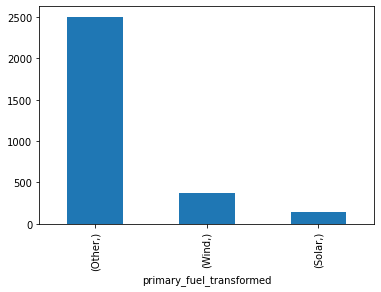

In [12]:

df_transformed_combined[['primary_fuel_transformed']].value_counts().plot.bar()

In [18]:
X = df_transformed_combined.drop(columns=['primary_fuel_transformed', 'capacity_mw', 'latitude', 'longitude'])
y = df_transformed_combined['primary_fuel_transformed']

In [20]:
y

index
0       Other
1       Solar
2       Solar
3       Other
4       Other
        ...  
3005     Wind
3006    Other
3007    Other
3008    Other
3009    Other
Name: primary_fuel_transformed, Length: 3010, dtype: object

In [26]:
def make_mi_scores(X, y):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [27]:
mi_scores = make_mi_scores(X, y)
mi_scores[::3]

autumn_WS10M_2010                0.289016
spring_WS10M_2009                0.282634
autumn_CLRSKY_SFC_SW_DNI_2010    0.274735
winter_CLRSKY_SFC_SW_DNI_2009    0.270042
summer_WS10M_2010                0.267739
autumn_CLRSKY_SFC_SW_DNI_2009    0.263712
spring_CLRSKY_SFC_SW_DNI_2010    0.257262
ANN_TQV_2010                     0.255225
autumn_TQV_2010                  0.249834
summer_CLRSKY_SFC_SW_DNI_2009    0.239807
Name: MI Scores, dtype: float64

In [28]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

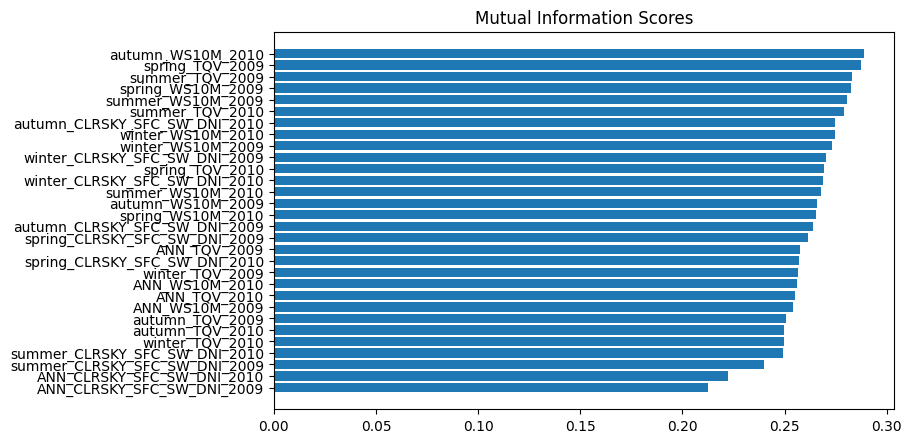

In [29]:
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [60]:
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

In [61]:
tree_model = DecisionTreeClassifier(random_state=0)
tree_model.fit(train_X, train_y)
y_pred = tree_model.predict(val_X)
# print(cross_val_score(lasso, X, y, cv=3))

In [62]:
confusion_matrix = confusion_matrix(val_y, y_pred)

<AxesSubplot:>

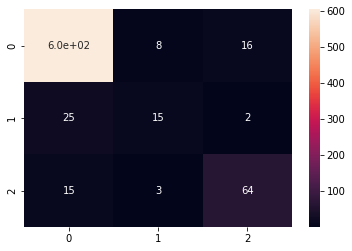

In [63]:

sns.heatmap(confusion_matrix, annot=True)

In [64]:
accuracy_score(val_y, y_pred)

0.9083665338645418

In [65]:
precision_score(val_y, y_pred, average='weighted')

0.9006945780780674

In [66]:
tree_model.score(val_X, val_y)

0.9083665338645418

[Text(0.5160643047112462, 0.9705882352941176, 'X[29] <= 5.48\ngini = 0.293\nsamples = 2257\nvalue = [1874, 95, 288]'),
 Text(0.26256174012158057, 0.9117647058823529, 'X[28] <= 3.948\ngini = 0.158\nsamples = 1898\nvalue = [1738, 84, 76]'),
 Text(0.12082066869300911, 0.8529411764705882, 'X[20] <= 11.235\ngini = 0.059\nsamples = 1453\nvalue = [1409, 23, 21]'),
 Text(0.03951367781155015, 0.7941176470588235, 'X[6] <= 10.478\ngini = 0.486\nsamples = 32\nvalue = [21, 9, 2]'),
 Text(0.0243161094224924, 0.7352941176470589, 'X[22] <= 2.673\ngini = 0.539\nsamples = 16\nvalue = [6, 9, 1]'),
 Text(0.0121580547112462, 0.6764705882352942, 'X[15] <= 12.47\ngini = 0.375\nsamples = 4\nvalue = [3, 0, 1]'),
 Text(0.0060790273556231, 0.6176470588235294, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.0182370820668693, 0.6176470588235294, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.0364741641337386, 0.6764705882352942, 'X[1] <= 7.755\ngini = 0.375\nsamples = 12\nvalue = [3, 9, 0]'),
 Text(

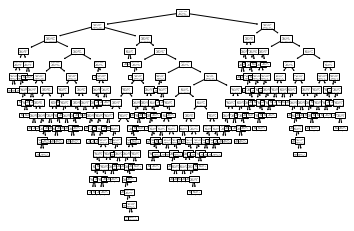

In [68]:
# tree.plot_tree(tree_model)